In [73]:
import re
import numpy as np
import pandas as pd
from sqlalchemy import create_engine

import plotly
import plotly.graph_objects as go
from plotly.graph_objs import Bar

In [3]:
engine = create_engine('sqlite:///../app/data/DisasterResponse.db')
df = pd.read_sql_table('disaster_response', engine)

In [5]:
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


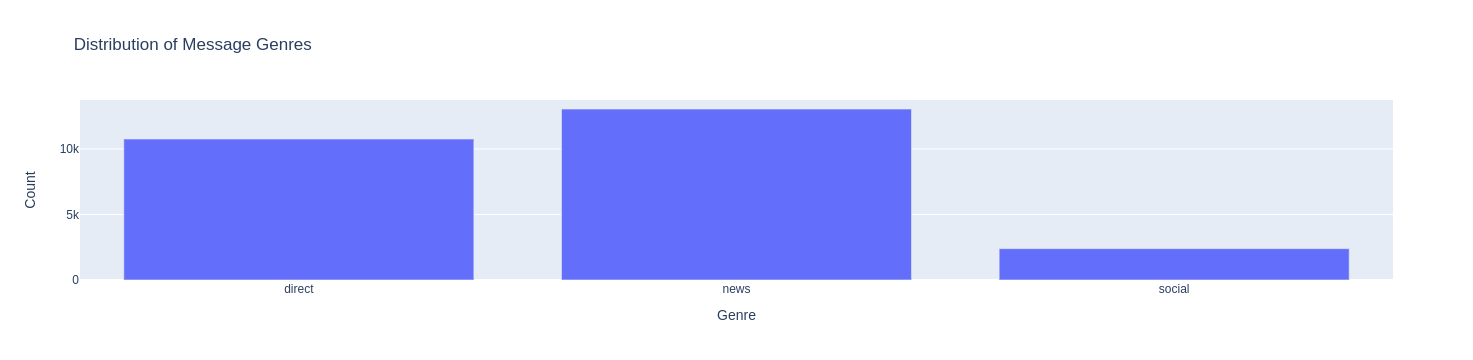

In [20]:
genre_counts = df.groupby('genre').count()['message']
genre_names = list(genre_counts.index)

data = [
    Bar(
        x=genre_names,
        y=genre_counts
    )
]

layout = {
    'title': 'Distribution of Message Genres',
    'yaxis': {
        'title': "Count"
    },
    'xaxis': {
        'title': "Genre"
    }
}

fig = go.Figure(data, layout)
fig.show()

In [25]:
### Most requested things
df_requests = df[df['request'] == 1]

In [95]:
dropped_columns = ['id', 'message', 'original', 'genre', 'related', 'request', 'offer', 'direct_report']
for column in df.columns:
    if re.search('related', column) is not None:
        dropped_columns.append(column)

In [96]:
bars_qtd = 10
idx = bars_qtd - 1

sums = df_requests.drop(columns=dropped_columns).sum()
sums_sorted = sums.sort_values(ascending=False)

x = sums_sorted[:idx].keys().to_list()
y = list(sums_sorted[:idx].values)

x.append('ohters')
y.append(sums_sorted[idx:].sum())

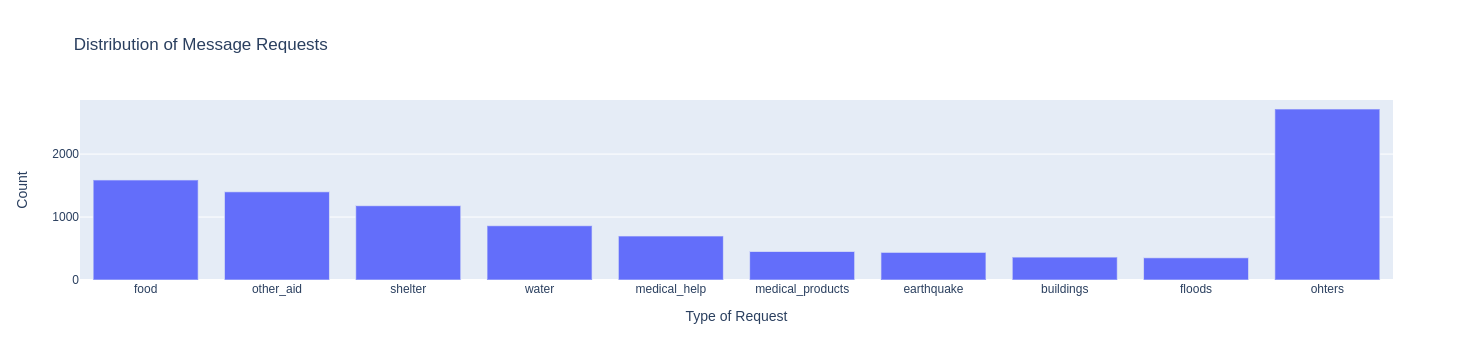

In [97]:
data = [
    Bar(
        x=x,
        y=y
    )
]

layout = {
    'title': 'Distribution of Message Requests',
    'yaxis': {
        'title': "Count"
    },
    'xaxis': {
        'title': "Type of Request"
    }
}

fig = go.Figure(data, layout)
fig.show()

In [98]:
### Most offered things
df_offers = df[df['offer'] == 1]

In [99]:
bars_qtd = 10
idx = bars_qtd - 1

sums = df_offers.drop(columns=dropped_columns).sum()
sums_sorted = sums.sort_values(ascending=False)

x = sums_sorted[:idx].keys().to_list()
y = list(sums_sorted[:idx].values)

x.append('ohters')
y.append(sums_sorted[idx:].sum())

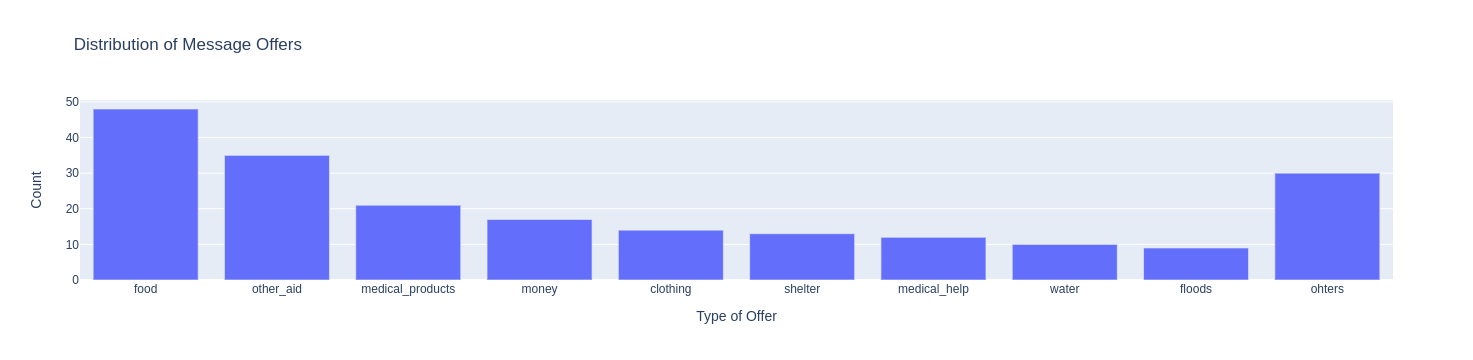

In [100]:
data = [
    Bar(
        x=x,
        y=y
    )
]

layout = {
    'title': 'Distribution of Message Offers',
    'yaxis': {
        'title': "Count"
    },
    'xaxis': {
        'title': "Type of Offer"
    }
}

fig = go.Figure(data, layout)
fig.show()